# SGD, Adam, Adagrad, RMSprop 비교

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [21]:
# Data load
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

# 차수 변경
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# 표준화
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# L = 5
n_input = 784  # x_train 출력 값
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10   # y_train 출력 값

# 하이퍼매개변수
batch_size = 256
n_epoch = 50

In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1,input_shape=(n_input,), activation = 'relu'))
    model.add(Dense(units=n_hidden2, activation = 'relu'))
    model.add(Dense(units=n_hidden3, activation = 'relu'))
    model.add(Dense(units=n_hidden4, activation = 'relu'))
    model.add(Dense(units=n_output, activation = 'softmax'))
    return model

In [30]:
def optimizer(OPT):
    model = build_model()
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer = OPT(), metrics = ['accuracy'])
    hist = model.fit(x_train,y_train, batch_size = batch_size, epochs = n_epoch, validation_data=(x_test,y_test), verbose = 2)
    return hist

In [31]:
# SGD
sgd_hist = optimizer(SGD)

Epoch 1/50
235/235 - 4s - loss: 1.3587 - accuracy: 0.6067 - val_loss: 0.8507 - val_accuracy: 0.6823 - 4s/epoch - 17ms/step
Epoch 2/50
235/235 - 4s - loss: 0.7163 - accuracy: 0.7548 - val_loss: 0.6545 - val_accuracy: 0.7784 - 4s/epoch - 15ms/step
Epoch 3/50
235/235 - 4s - loss: 0.6005 - accuracy: 0.7965 - val_loss: 0.6185 - val_accuracy: 0.7800 - 4s/epoch - 15ms/step
Epoch 4/50
235/235 - 4s - loss: 0.5441 - accuracy: 0.8132 - val_loss: 0.5327 - val_accuracy: 0.8153 - 4s/epoch - 16ms/step
Epoch 5/50
235/235 - 4s - loss: 0.5095 - accuracy: 0.8226 - val_loss: 0.5357 - val_accuracy: 0.8094 - 4s/epoch - 16ms/step
Epoch 6/50
235/235 - 4s - loss: 0.4894 - accuracy: 0.8282 - val_loss: 0.5327 - val_accuracy: 0.8107 - 4s/epoch - 15ms/step
Epoch 7/50
235/235 - 4s - loss: 0.4713 - accuracy: 0.8348 - val_loss: 0.4813 - val_accuracy: 0.8315 - 4s/epoch - 17ms/step
Epoch 8/50
235/235 - 4s - loss: 0.4558 - accuracy: 0.8398 - val_loss: 0.5656 - val_accuracy: 0.8071 - 4s/epoch - 16ms/step
Epoch 9/50
235/2

In [32]:
# Adam
adam_hist = optimizer(Adam)

# Adagrad
Adagrad_hist = optimizer(Adagrad)

#RMSprop
RMSprop_hist = optimizer(RMSprop)

Epoch 1/50
235/235 - 5s - loss: 0.5034 - accuracy: 0.8198 - val_loss: 0.4516 - val_accuracy: 0.8353 - 5s/epoch - 21ms/step
Epoch 2/50
235/235 - 4s - loss: 0.3547 - accuracy: 0.8699 - val_loss: 0.3908 - val_accuracy: 0.8543 - 4s/epoch - 19ms/step
Epoch 3/50
235/235 - 4s - loss: 0.3172 - accuracy: 0.8814 - val_loss: 0.3882 - val_accuracy: 0.8563 - 4s/epoch - 18ms/step
Epoch 4/50
235/235 - 4s - loss: 0.2941 - accuracy: 0.8919 - val_loss: 0.3333 - val_accuracy: 0.8811 - 4s/epoch - 18ms/step
Epoch 5/50
235/235 - 4s - loss: 0.2723 - accuracy: 0.8974 - val_loss: 0.3386 - val_accuracy: 0.8797 - 4s/epoch - 18ms/step
Epoch 6/50
235/235 - 4s - loss: 0.2604 - accuracy: 0.9030 - val_loss: 0.3313 - val_accuracy: 0.8817 - 4s/epoch - 19ms/step
Epoch 7/50
235/235 - 4s - loss: 0.2454 - accuracy: 0.9071 - val_loss: 0.3363 - val_accuracy: 0.8802 - 4s/epoch - 18ms/step
Epoch 8/50
235/235 - 4s - loss: 0.2383 - accuracy: 0.9094 - val_loss: 0.3333 - val_accuracy: 0.8836 - 4s/epoch - 19ms/step
Epoch 9/50
235/2

Epoch 18/50
235/235 - 4s - loss: 0.4730 - accuracy: 0.8375 - val_loss: 0.4971 - val_accuracy: 0.8276 - 4s/epoch - 18ms/step
Epoch 19/50
235/235 - 4s - loss: 0.4671 - accuracy: 0.8388 - val_loss: 0.4917 - val_accuracy: 0.8284 - 4s/epoch - 18ms/step
Epoch 20/50
235/235 - 4s - loss: 0.4614 - accuracy: 0.8411 - val_loss: 0.4872 - val_accuracy: 0.8297 - 4s/epoch - 18ms/step
Epoch 21/50
235/235 - 4s - loss: 0.4563 - accuracy: 0.8426 - val_loss: 0.4861 - val_accuracy: 0.8284 - 4s/epoch - 17ms/step
Epoch 22/50
235/235 - 4s - loss: 0.4514 - accuracy: 0.8444 - val_loss: 0.4780 - val_accuracy: 0.8338 - 4s/epoch - 18ms/step
Epoch 23/50
235/235 - 4s - loss: 0.4469 - accuracy: 0.8464 - val_loss: 0.4750 - val_accuracy: 0.8327 - 4s/epoch - 17ms/step
Epoch 24/50
235/235 - 4s - loss: 0.4431 - accuracy: 0.8464 - val_loss: 0.4715 - val_accuracy: 0.8330 - 4s/epoch - 18ms/step
Epoch 25/50
235/235 - 4s - loss: 0.4388 - accuracy: 0.8476 - val_loss: 0.4677 - val_accuracy: 0.8356 - 4s/epoch - 18ms/step
Epoch 26

Epoch 35/50
235/235 - 7s - loss: 0.1980 - accuracy: 0.9346 - val_loss: 0.8649 - val_accuracy: 0.8884 - 7s/epoch - 31ms/step
Epoch 36/50
235/235 - 8s - loss: 0.1806 - accuracy: 0.9372 - val_loss: 0.9345 - val_accuracy: 0.8768 - 8s/epoch - 33ms/step
Epoch 37/50
235/235 - 7s - loss: 0.1882 - accuracy: 0.9367 - val_loss: 0.9186 - val_accuracy: 0.8647 - 7s/epoch - 28ms/step
Epoch 38/50
235/235 - 7s - loss: 0.1765 - accuracy: 0.9375 - val_loss: 0.8939 - val_accuracy: 0.8803 - 7s/epoch - 29ms/step
Epoch 39/50
235/235 - 6s - loss: 0.1748 - accuracy: 0.9387 - val_loss: 1.0903 - val_accuracy: 0.8884 - 6s/epoch - 27ms/step
Epoch 40/50
235/235 - 6s - loss: 0.1781 - accuracy: 0.9381 - val_loss: 0.9044 - val_accuracy: 0.8763 - 6s/epoch - 27ms/step
Epoch 41/50
235/235 - 7s - loss: 0.1700 - accuracy: 0.9396 - val_loss: 0.9079 - val_accuracy: 0.8894 - 7s/epoch - 29ms/step
Epoch 42/50
235/235 - 7s - loss: 0.1743 - accuracy: 0.9422 - val_loss: 0.7996 - val_accuracy: 0.8925 - 7s/epoch - 28ms/step
Epoch 43

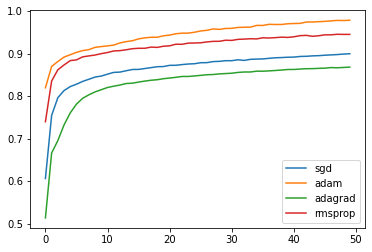

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=sgd_hist.history['accuracy'])
sns.lineplot(data=adam_hist.history['accuracy'])
sns.lineplot(data=Adagrad_hist.history['accuracy'])
sns.lineplot(data=RMSprop_hist.history['accuracy'])
plt.legend(['sgd','adam','adagrad','rmsprop',])
# sgd_hist.history['accuracy']
# adam_hist.history['accuracy']
# Adagrad_hist.history['accuracy']
# RMSprop_hist.history['accuracy']

---

In [ ]:
# 교차검증을 이용한 성능비교 - colab사용
# KFold
# k = 5
# KFold(k).split(x_train)
# boxplot을 이용해서 시각화

In [ ]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "0"